    threads        time
0         8  169.427873
1        16   74.391744
2         1  907.030142
3         4  252.821466
4         4  261.117780
5         4  260.666149
6         8  169.124287
7        32   37.066895
8         4  254.386189
9         1  907.774687
10        2  493.835591
11        8  169.815036
12        2  496.011843
13       16   74.300452
14        1  904.280408
15       16   78.538529
16       32   38.888111
17       32   38.149561
18        2  495.419096
19       32   40.033586
20       16   74.920611
21        8  170.531193
22        2  498.114882
23       16   75.074625
24        4  258.801875
25       32   37.411322
26        8  170.911891
27        1  909.400320
28        2  498.763916
29        1  905.843394
serial times:
               time
threads            
1        906.865790
2        496.429066
4        257.558692
8        169.962056
16        75.445192
32        38.309895




all_remote:
               time
threads            
1        907.511122
2     

/tmp/ipykernel_842577/2768863978.py:138: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_842577/2768863978.py:138: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_842577/2768863978.py:146: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_842577/2768863978.py:146: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_842577/2768863978.py:154: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x3['time'],
/tmp/ipykernel_842577/2768863978.py:154: UserWarning: Ignoring `pa

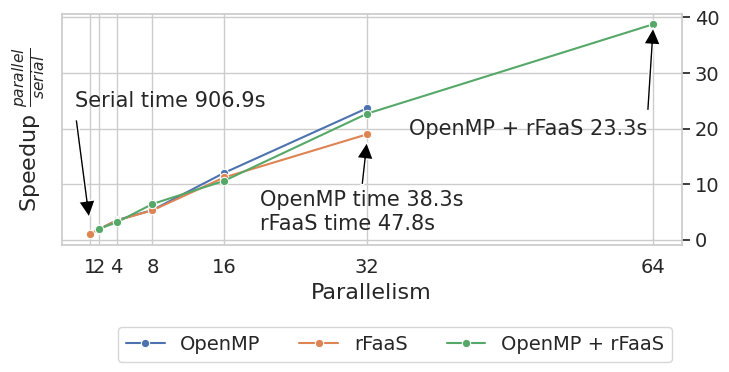

In [1]:
import json
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import glob
import pandas as pd


import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from matplotlib.ticker import FormatStrFormatter
import math


import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
workers = [1,2,4,8,16,32]


def lines_that_start_with(string, fp):
    return [line for line in fp if line.startswith(string)]

data_all_remote = []
data_half_remote = []
data_no_remote = []

#for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline/ault/lulesh_27/lulesh_*.out')):

for f in glob.glob(os.path.join(BASE_PATH, f'data/faas_applications/openmc/particles-10000/all-remote/particles10000.*')):
    with open(f, 'r') as fp:
        for line in lines_that_start_with("total_compute ", fp):
            threads = f.split('.')[-2]
            threads = int(threads.replace( 'threads', ''))
            data_all_remote.append([threads, float(line.split()[-1])])
all_remote = pd.DataFrame(data=data_all_remote, columns=['threads', 'time'])


for f in glob.glob(os.path.join(BASE_PATH, f'data/faas_applications/openmc/particles-10000/half-remote/particles10000.*')):
    with open(f, 'r') as fp:
        for line in lines_that_start_with("total_compute ", fp):
            threads = f.split('.')[-2]
            threads = int(threads.replace( 'threads', ''))
            # change here - we have twice as many results
            threads *= 2
            data_half_remote.append([threads, float(line.split()[-1])])
half_remote = pd.DataFrame(data=data_half_remote, columns=['threads', 'time'])

for f in glob.glob(os.path.join(BASE_PATH, f'data/faas_applications/openmc/particles-10000/no-remote/particles10000.*')):
    with open(f, 'r') as fp:
        for line in lines_that_start_with("total_compute ", fp):
            threads = f.split('.')[-2]
            threads = int(threads.replace( 'threads', ''))
            data_no_remote.append([threads, float(line.split()[-1])])
no_remote = pd.DataFrame(data=data_no_remote, columns=['threads', 'time'])

print(no_remote)


#sns.set(rc={'figure.figsize':(8,4)})
sns.set(rc={'figure.figsize':(8,3)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)

def bandwidth_function(x, p):
    # mebibytes/s
    #bw = 11464.333008
    bw = 11686.41
    # 2 - round-trip
    # x - number of workers
    # size - basic msg size
    return p*(size*size*24)/ (bw * 1024 * 1024) * 1000
xrange = list(range(200, 800))#[200,2,4,8,12,16,20,24,28,32,64]

omp  = no_remote.groupby(['threads']).mean() # times for no-remote
elastic = all_remote.groupby(['threads']).mean()

print("serial times:")
print(omp)

print("\n\n\n")
print("all_remote:")
print(elastic)



SERIAL = 906.8657902

print("serial:")
print(SERIAL)
# TODO is this needed? 
x = omp
x['time'] = SERIAL / x['time']

elastic2  = half_remote.groupby(['threads']).mean()

print("\n\n\n")
print("half_remote:")
print(elastic2)


x2 = elastic
x2['time']=  SERIAL /x2['time']#.reset_index()
#print(x2)
x3 = elastic2
x3['time'] = SERIAL / x3['time'] 
print("elastic:")
print(elastic)
print("omp:")
print(omp)

#print('omp/rfaas')
#print(omp/elastic)
#print(elastic2/omp)



fig, ax = plt.subplots()
#print(x['time'])


sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
             ci=95, marker="o",
             label='d',
             #estimator=p50_estimator,
             color=sns.color_palette()[0],
             palette=sns.color_palette()[0],
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)
sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
             ci=95, marker="o",
             label='s',
             #estimator=p50_estimator,
             color=sns.color_palette()[1],
             palette=sns.color_palette()[1],
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)
sns.lineplot(data=x3['time'],
             ci=95, marker="o",
             #estimator=p50_estimator,
             color=sns.color_palette()[2],
             palette=sns.color_palette()[2],
             label='r',
             #data=x2,
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)

ax.annotate('OpenMP time 38.3s\nrFaaS time 47.8s', xy=(32, 18), xytext=(20,5),fontsize=15,#fontweight='bold',
#ax.annotate('rFaaS on par with\nOpenMP', xy=(32, 16), xytext=(20,5),fontsize=15,#fontweight='bold',
ha="left", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)
ax.annotate('OpenMP + rFaaS 23.3s', xy=(64, 39), xytext=(50,20),fontsize=15,#fontweight='bold',
#ax.annotate('rFaaS on par with\nOpenMP', xy=(32, 16), xytext=(20,5),fontsize=15,#fontweight='bold',
ha="center", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)

ax.annotate('Serial time 906.9s', xytext=(10,25), xy=(1, 3),fontsize=15,#fontweight='bold',
ha="center", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)

ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xticks([1, 2, 4, 8, 16, 32, 64])
#ax.set_xlabel('Parallelism',fontsize=16)
#ax.set_ylabel(r'Speedup $\frac{parallel}{serial}$',fontsize=16,labelpad=10)
#ax[0].yaxis.set_label_position("right")
#ax.set_ylabel('Speedup',fontsize=16)

ax.set_xlabel('Parallelism',fontsize=16)
ax.set_ylabel(r'Speedup $\frac{parallel}{serial}$',fontsize=16,labelpad=10)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
#ax[1].set_yscale('log')
#ax[0].set_xlim([])
#ax[1].set_xlim([400, 800])
#ax[1].yaxis.set_label_position("right")
ax.yaxis.tick_right()
#ax[0].set_ylim([1, 2.4])
#ax2.set_ylim([0,1200])

handles, labels = ax.get_legend_handles_labels()
print(handles, labels)
#print(handles,labels)
ax.legend(handles[0:3], ['OpenMP', 'rFaaS', 'OpenMP + rFaaS'],ncol=3, bbox_to_anchor=(1.0, -0.55),# ncol=3, 
             loc='lower right', fontsize=14)
#ax[0].legend().set_visible(False)
fig.savefig(os.path.join("plots", "faas", "openmc_speedup_new_large.pdf"),bbox_inches='tight',pad_inches = 0, transparent=False)
#plt.show()




    threads       time
0         1  91.147150
1         4  24.008584
2         2  46.851169
3         8  12.475725
4         8  12.431221
5         4  24.059388
6        32   4.551586
7         8  12.418857
8        16   6.639794
9         1  92.205803
10       16   6.625340
11        2  46.908154
12        4  23.909992
13       16   6.614206
14       32   4.524154
15       32   4.550786
16       16   6.655278
17        2  46.869916
18        2  47.198210
19        1  91.742701
20       16   6.648111
21        1  90.249983
22       32   4.514857
23        4  23.980294
24        2  47.200323
25       32   4.530872
26        1  91.651319
27        8  12.424507
28        4  24.060073
29        8  12.484474
serial times:
              time
threads           
1        91.399391
2        47.005554
4        24.003666
8        12.446957
16        6.636546
32        4.534451




all_remote:
              time
threads           
1        92.198283
2        47.365434
4        27.978590
8        1

/tmp/ipykernel_842577/4079117255.py:133: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_842577/4079117255.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_842577/4079117255.py:141: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_842577/4079117255.py:141: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_842577/4079117255.py:149: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x3['time'],
/tmp/ipykernel_842577/4079117255.py:149: UserWarning: Ignoring `pa

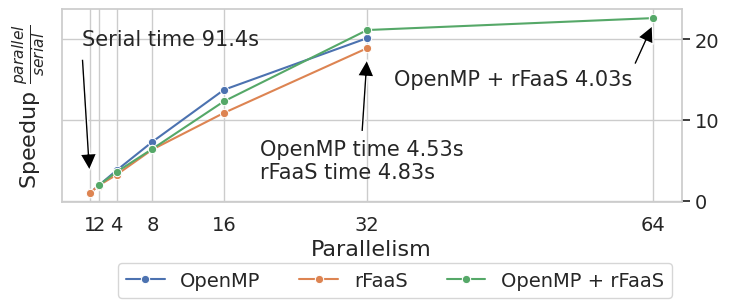

In [2]:
import json
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import glob
import pandas as pd


import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from matplotlib.ticker import FormatStrFormatter
import math

BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
workers = [1,2,4,8,16,32]


def lines_that_start_with(string, fp):
    return [line for line in fp if line.startswith(string)]

data_all_remote = []
data_half_remote = []
data_no_remote = []

#for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline/ault/lulesh_27/lulesh_*.out')):

for f in glob.glob(os.path.join(BASE_PATH, f'data/faas_applications/openmc/particles-1000/all-remote/particles1000.*')):
    with open(f, 'r') as fp:
        for line in lines_that_start_with("total_compute ", fp):
            threads = f.split('.')[-2]
            threads = int(threads.replace( 'threads', ''))
            data_all_remote.append([threads, float(line.split()[-1])])
all_remote = pd.DataFrame(data=data_all_remote, columns=['threads', 'time'])


for f in glob.glob(os.path.join(BASE_PATH, f'data/faas_applications/openmc/particles-1000/half-remote/particles1000.*')):
    with open(f, 'r') as fp:
        for line in lines_that_start_with("total_compute ", fp):
            threads = f.split('.')[-2]
            threads = int(threads.replace( 'threads', ''))
            # change here - we have twice as many results
            threads *= 2
            data_half_remote.append([threads, float(line.split()[-1])])
half_remote = pd.DataFrame(data=data_half_remote, columns=['threads', 'time'])

for f in glob.glob(os.path.join(BASE_PATH, f'data/faas_applications/openmc/particles-1000/no-remote/particles1000.*')):
    with open(f, 'r') as fp:
        for line in lines_that_start_with("total_compute ", fp):
            threads = f.split('.')[-2]
            threads = int(threads.replace( 'threads', ''))
            data_no_remote.append([threads, float(line.split()[-1])])
no_remote = pd.DataFrame(data=data_no_remote, columns=['threads', 'time'])

print(no_remote)


#sns.set(rc={'figure.figsize':(8,4)})
sns.set(rc={'figure.figsize':(8,2.5)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)

def bandwidth_function(x, p):
    # mebibytes/s
    #bw = 11464.333008
    bw = 11686.41
    # 2 - round-trip
    # x - number of workers
    # size - basic msg size
    return p*(size*size*24)/ (bw * 1024 * 1024) * 1000
xrange = list(range(200, 800))#[200,2,4,8,12,16,20,24,28,32,64]

omp  = no_remote.groupby(['threads']).mean() # times for no-remote
elastic = all_remote.groupby(['threads']).mean()

print("serial times:")
print(omp)

print("\n\n\n")
print("all_remote:")
print(elastic)


SERIAL = 91.4
#SERIAL = 906.8657902

print("serial:")
print(SERIAL)
# TODO is this needed? 
x = omp
x['time'] = SERIAL / x['time']

elastic2  = half_remote.groupby(['threads']).mean()

print("\n\n\n")
print("half_remote:")
print(elastic2)


x2 = elastic
x2['time']=  SERIAL /x2['time']#.reset_index()
#print(x2)
x3 = elastic2
x3['time'] = SERIAL / x3['time'] 
print("elastic:")
print(elastic)
print("omp:")
print(omp)

#print('omp/rfaas')
#print(omp/elastic)
#print(elastic2/omp)



fig, ax = plt.subplots()
print(x['time'])


sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
             ci=95, marker="o",
             label='d',
             #estimator=p50_estimator,
             color=sns.color_palette()[0],
             palette=sns.color_palette()[0],
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)
sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
             ci=95, marker="o",
             label='s',
             #estimator=p50_estimator,
             color=sns.color_palette()[1],
             palette=sns.color_palette()[1],
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)
sns.lineplot(data=x3['time'],
             ci=95, marker="o",
             #estimator=p50_estimator,
             color=sns.color_palette()[2],
             palette=sns.color_palette()[2],
             label='r',
             #data=x2,
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)

ax.annotate('OpenMP time 4.53s\nrFaaS time 4.83s', xy=(32, 18), xytext=(20,5),fontsize=15,#fontweight='bold',
#ax.annotate('rFaaS on par with\nOpenMP', xy=(32, 16), xytext=(20,5),fontsize=15,#fontweight='bold',
ha="left", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)
ax.annotate('OpenMP + rFaaS 4.03s', xy=(64, 22), xytext=(35,15),fontsize=15,#fontweight='bold',
#ax.annotate('rFaaS on par with\nOpenMP', xy=(32, 16), xytext=(20,5),fontsize=15,#fontweight='bold',
ha="left", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)

ax.annotate('Serial time 91.4s', xytext=(10,20), xy=(1, 3),fontsize=15,#fontweight='bold',
ha="center", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)

ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xticks([1, 2, 4, 8, 16, 32, 64])
#ax.set_xlabel('Parallelism',fontsize=16)
#ax.set_ylabel(r'Speedup $\frac{parallel}{serial}$',fontsize=16,labelpad=10)
#ax[0].yaxis.set_label_position("right")
#ax.set_ylabel('Speedup',fontsize=16)

ax.set_xlabel('Parallelism',fontsize=16)
ax.set_ylabel(r'Speedup $\frac{parallel}{serial}$',fontsize=16,labelpad=10)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
#ax[1].set_yscale('log')
#ax[0].set_xlim([])
#ax[1].set_xlim([400, 800])
#ax[1].yaxis.set_label_position("right")
ax.yaxis.tick_right()
#ax[0].set_ylim([1, 2.4])
#ax2.set_ylim([0,1200])

handles, labels = ax.get_legend_handles_labels()
print(handles, labels)
#print(handles,labels)
ax.legend(handles[0:3], ['OpenMP', 'rFaaS', 'OpenMP + rFaaS'],ncol=3, bbox_to_anchor=(1.0, -0.55),# ncol=3, 
             loc='lower right', fontsize=14)
#ax[0].legend().set_visible(False)
fig.savefig(os.path.join("plots", "faas", "openmc_speedup_new_small.pdf"),bbox_inches='tight',pad_inches = 0, transparent=False)
#plt.show()


